# Exercice 2 - Regression lineaire multiple et inference statistique (suite de l'exercice 1 / partie 3)

Dans le probleme suivant, on considere que l'on connait les notes moyennes sur l'année de n eleves dans p matieres, ainsi que leur note a un concours specifique en fin d'annee. On se demande si on ne pourrait pas prédire la note des etudiants au concours en fonction de leur moyenne annuelle afin d'estimer leurs chances au concours.

On va resoudre le probleme a l'aide de la regression lineaire multiple de scikitlearn (et plus a la main) et estimer a quel point les predictions sont precises par inference statistique.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Partie 1 -- Apprentissage/prediction :
- Bien comprendre la fonction 'SimulateObservations2'
- A l'aide de la fonction 'SimulateObservations2', simulez un jeu de donnees d'apprentissage `[X_l,y_l]` avec n_l=30 observations et un jeu de test `[X_t,y_t]` avec n_t=1000 observations. Les observations seront en dimension p=10.
- Effectuez la regression lineaire multiple avec sklearn.linear_model.LinearRegression
- representez un nuage de points dont chaque point a pour coordonnee (y_true,y_predicted). Les observations test seront utilisees. Calculez de meme la 'mean squared error' sur ces donnees 

In [57]:
def SimulateObservations2(n_train,n_test,p):
  """
  n_train: number of training obserations to simulate
  n_test: number of test obserations to simulate
  p: dimension of the observations to simulate
  """
  
  ObsX_train=20.*np.random.rand(n_train,p)
  ObsX_tst=20.*np.random.rand(n_test,p)
  
  RefTheta=np.random.rand(p)
  RefTheta=RefTheta/RefTheta.sum()
#   print("The thetas with which the values were simulated is: "+str(RefTheta))
  
  ObsY_train=np.dot(ObsX_train,RefTheta.reshape(p,1))+1.5*np.random.randn(n_train,1)
  ObsY_tst=np.dot(ObsX_tst,RefTheta.reshape(p,1))+1.5*np.random.randn(n_test,1)
  
  return [ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta]


In [10]:
n=30
p=10

#TO DO
# Generate n=30 training values and 1000 test values for p=10
[ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta] = SimulateObservations2(n, 1000, p)


The thetas with which the values were simulated is: [0.13435228 0.00723777 0.18970449 0.04285444 0.07806254 0.06967275
 0.15700267 0.04505242 0.105381   0.17067965]


array([[ 3.97021452, 10.18631907, 18.05454981,  1.14067442,  5.37640605,
         1.83194831,  2.17376791,  7.84821155, 17.25437092,  3.70593704],
       [11.96350204, 10.92002755, 10.92762199,  6.78408617,  2.380139  ,
         5.86053625, 14.54618428, 15.77610194,  9.28267543,  3.3555868 ],
       [ 0.32117165,  7.75439695, 16.70351757, 12.9588675 , 11.13738099,
         1.12512635, 10.18983957,  0.60910983,  9.4673075 ,  2.53873282],
       [19.57621367,  3.27670212, 10.87006446, 11.23562339, 10.46759861,
         5.90363103,  1.57433902,  1.19329862, 16.65614279,  9.33272777],
       [17.82117778, 11.23880486,  2.95272737,  9.8206051 , 15.19488681,
         2.13711589,  0.28892363, 19.88523508,  8.69208077,  9.84974948],
       [10.10603142,  1.45957685,  8.47090861, 17.64658264, 11.4050002 ,
        14.37638082,  5.69245381,  9.64994343,  1.41476258, 14.45872308],
       [ 4.05039107,  2.17020068, 15.26950731, 18.90422162,  0.09828051,
         6.06119956, 13.47807448,  6.65837015

In [15]:
# Make te regression on train data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(ObsX_train, ObsY_train)
print(f"Resultat de la regression linéaire:\n Y = {lr.coef_}X + {lr.intercept_}")
#TO DO


Resultat de la regression linéaire:
 Y = [[ 0.12733556 -0.04017518  0.09682678 -0.05454452  0.10473409  0.08299551
   0.17171701  0.01351496  0.17921815  0.12169047]]X + [2.3987476]


In [24]:
# Compute MSE
  y_true = ObsY_tst
  y_pred = lr.predict(ObsX_tst)
  
  MSE=np.mean(np.power(y_pred-y_true,2.))
  MSE

3.1284066497503287

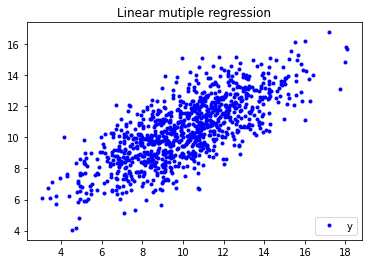

In [66]:
# representez un nuage de points dont chaque point a pour coordonnee (y_true,y_predicted).
fig = plt.figure()
plt.plot(y_true, y_pred, 'b.')
plt.legend(("y pred in fct of y true"), loc='lower right')
plt.title('Linear mutiple regression')
plt.show()

# Partie 2 -- Inference sur les erreurs : 
On fait l'hypotese que le bruit sur les observations est Gaussien (ce qui est vrai puisqu'on a simule les donnees comme ca). Nous allons alors etudier comment les erreurs d'approximation sont distribuees.
- Utilisez les fonction np.histogram et plt.plot pour representer la distribution de l'erreur d'approximation dans les donnees de la partie 1.
- La distribution de l'erreur est liee a une loi de student a n-p-1 degres de libertes. Nous n'allons pas caller cette loi a nos donnees mais simplement mesurer la moyenne de erreur au carre (MSE - ou biais) dans nos donnees pour evaluer a quel point notre methode est precise.

In [99]:
erreurs= y_true - y_pred
?np.histogram

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to t

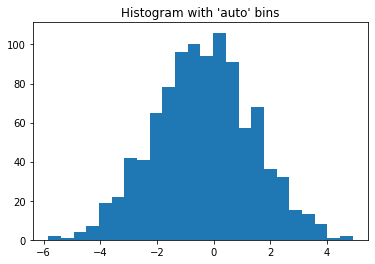

In [100]:
plt.hist(erreurs, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

In [104]:
histo_erreurs= np.histogram(erreurs, bins=20)
histo_erreurs

(array([  2,   2,   5,  17,  29,  50,  53,  94, 113, 112, 114, 133,  80,
         74,  51,  37,  17,  10,   5,   2]),
 array([-5.83574967, -5.29855887, -4.76136808, -4.22417729, -3.68698649,
        -3.1497957 , -2.61260491, -2.07541411, -1.53822332, -1.00103252,
        -0.46384173,  0.07334906,  0.61053986,  1.14773065,  1.68492144,
         2.22211224,  2.75930303,  3.29649383,  3.83368462,  4.37087541,
         4.90806621]))

Text(0.5, 1.0, 'Mean squared error=195.23110627259436')

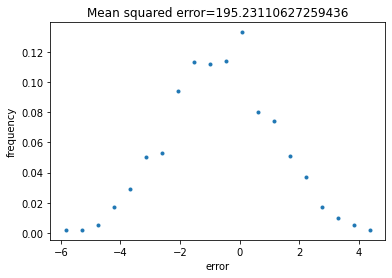

In [134]:
plt.plot(histo_erreurs[1][:-1], histo_erreurs[0]/np.sum(histo_erreurs[0]), '.')
plt.xlabel('error')
plt.ylabel('frequency')
plt.title('Mean squared error='+str(MSE))

In [69]:
MSE=np.mean(np.power(erreurs,2.))
MSE

3.1284066497503287

# Partie 3 -- Variations de l'erreur pour differentes valeurs de n ou p : 
- Reproduire les parties 1 et 2 de l'exercice pour different nombres d'observations d'apprentissage (n) et differentes dimensions des observations (p) :

[Tests 1] : $(n=30,p=1) , (n=30,p=5) , (n=30,p=10) , (n=30,p=15) , (n=30,p=20) , (n=30,p=25) , (n=30,p=29)$

[Tests 2] : $(n=11,p=10) ,(n=15,p=10) ,(n=20,p=10) ,(n=30,p=10) , (n=60,p=10) , (n=100,p=10)$

Aussi bien pour [Tests 1] que pour [Tests 2], verifiez comment evolue la MSE quand n ou p varie.

In [138]:
def GetMSE(n_train,n_test,p, ax):
  [ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta] = SimulateObservations2(n_train, n_test, p)
  lr = LinearRegression()
  lr.fit(ObsX_train, ObsY_train)

  y_pred = lr.predict(ObsX_tst)

  MSE=np.mean(np.power(y_pred-ObsY_tst,2.))

  histo_erreurs= np.histogram(erreurs, bins=20)
  ax.plot(histo_erreurs[1][:-1], histo_erreurs[0]/np.sum(histo_erreurs[0]), '.')
  ax.set_xlabel('error')
  ax.set_ylabel('frequency')
  ax.set_title(f"({n=},{p=}), {MSE=:.1f}")
  return MSE

	Compute MSE with n=30 and p variables
for p=1, 	MSE=2.3556976078724645
for p=5, 	MSE=3.0304277427197785
for p=10, 	MSE=3.306021267121342
for p=15, 	MSE=3.9189494521924453
for p=20, 	MSE=6.5547797010208795
for p=25, 	MSE=21.233265421766713
for p=29, 	MSE=1008.9377915359913


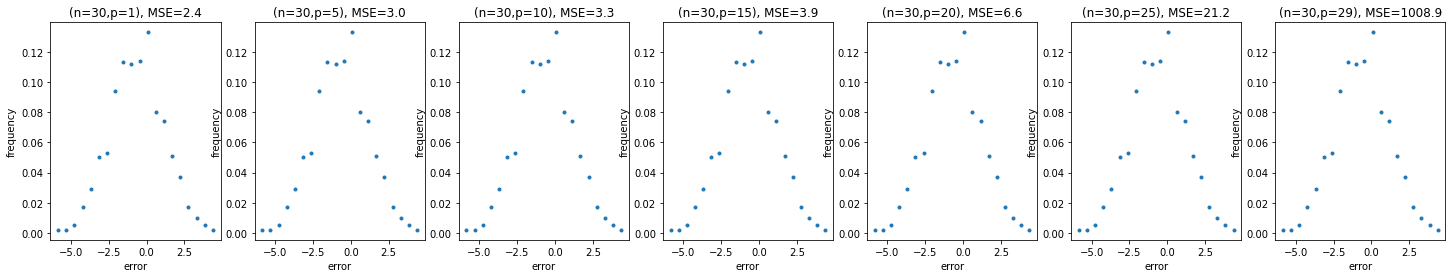

In [144]:
#  [Tests 1]

# MSE_30_1=GetMSE(30,1000,1)

#...TO DO
n = 30
n_test = 1000
p_list = [1]
[p_list.append(i) for i in range(5,30,5)]
p_list.append(29)
print("\tCompute MSE with n=30 and p variables")
fig, axs = plt.subplots(1, len(p_list), figsize=(25,4))
for index, p in enumerate(p_list):
    MSE = GetMSE(n,n_test,p, axs[index])
    print(f"for {p=}, \t{MSE=}")

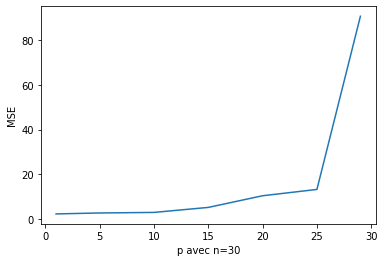

In [82]:
plt.plot(p_list, list([GetMSE(n,n_test,p) for p in p_list]))
plt.xlabel('p avec n=30')
plt.ylabel('MSE')
plt.show()

	Compute MSE with p=10
for n=11, 	MSE=24.229566344111745
for n=15, 	MSE=16.006464788002653
for n=20, 	MSE=7.700950376745635
for n=30, 	MSE=5.426589658419289
for n=60, 	MSE=2.4984208255370386
for n=100, 	MSE=2.5847366431567846


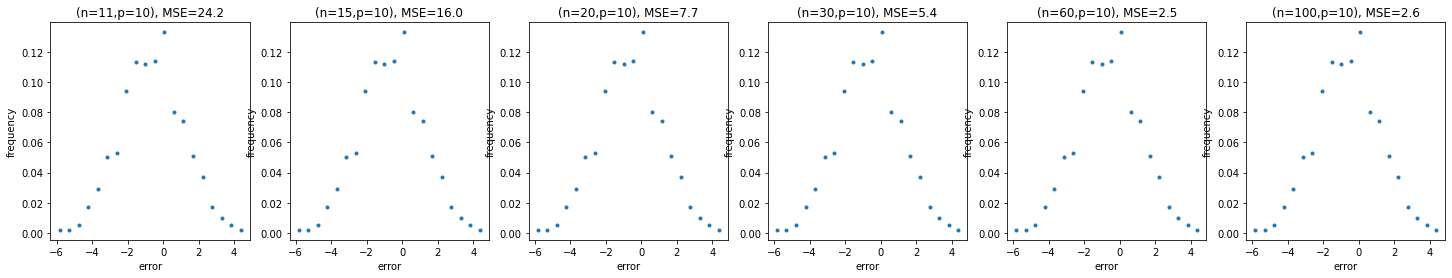

In [143]:
#  [Tests 2]

# MSE_11_10=GetMSE(11,1000,10)

#...TO DO
p = 10
n_list = [11,15,20,30,60,100]
print("\tCompute MSE with p=10")
fig, axs = plt.subplots(1, len(n_list), figsize=(25,4))
for index, n in enumerate(n_list):
    MSE = GetMSE(n,n_test,p, axs[index])
    print(f"for {n=}, \t{MSE=}")


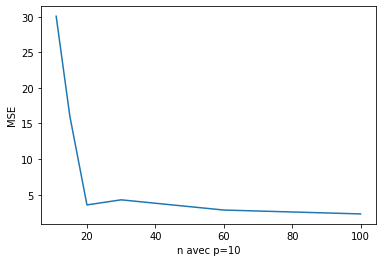

In [87]:
plt.plot(n_list, list([GetMSE(n,n_test,p) for n in n_list]))
plt.xlabel('n avec p=10')
plt.ylabel('MSE')
plt.show()